In [2]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\opts_and_metadata.pt")  # n_faces
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-15-11-33-09\opts_and_metadata.pt")  # dropout
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-16-08-02-15\opts_and_metadata.pt")  # spk window
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-16-17-51-37\opts_and_metadata.pt")  # weights
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-17-11-30-50\opts_and_metadata.pt")  # visibility
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-18-09-35-43\opts_and_metadata.pt")  # color
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-20-09-36-32\opts_and_metadata.pt")  # vert norm
file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-21-09-26-35\opts_and_metadata.pt")  # n_blocks
# file = Path(r"D:\resynth\run_48_49\with_dirac_eigs\2025-07-25-11-03-27\opts_and_metadata.pt")  # dirac again


# file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-07-26-10-42-13\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-07-27-12-12-10\opts_and_metadata.pt")  # The augmentation

file = Path(r"D:\resynth\run_20_21\run00020_resynth\2025-07-29-15-37-40\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_38_39\run00038_resynth\2025-07-30-11-58-55\opts_and_metadata.pt")  # decay vs no decay
file = Path(r"D:\resynth\run_38_39\run00038_resynth\2025-07-31-13-38-23\opts_and_metadata.pt")  # no decay, try lr
file = Path(r"D:\resynth\run_38_39\run00038_resynth\2025-08-01-13-19-36\opts_and_metadata.pt")  # different lrs, no decay

# file = Path(r"D:\resynth\run_48_49\run00048_resynth\2025-08-02-09-55-07\opts_and_metadata.pt")  # lrs and decays
# file = Path(r"D:\resynth\run_48_49\run00048_resynth\2025-08-03-12-13-13\opts_and_metadata.pt")  # Larger
readers = Readers.from_file(file)

# to try:
# number of diffnet layers
# normalize verts?

In [4]:
readers.hparams.iloc[:, 3:]

,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,n_blocks,dropout,n_faces,spike_window,weight_error,augment,use_visible,use_color,norm_verts,curr_learning_rate
0,xyz,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 9, 20, 1...",128,0.00001,25,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.953125e-08
1,xyz,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 9, 20, 1...",128,0.00001,500,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.000000e-05
2,xyz,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 9, 20, 1...",128,0.00010,25,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.953125e-07
3,xyz,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 9, 20, 1...",128,0.00010,500,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.000000e-04


In [7]:
len(readers[0].metadata.channel)

14

In [8]:
[.5 for _ in range(14)]

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

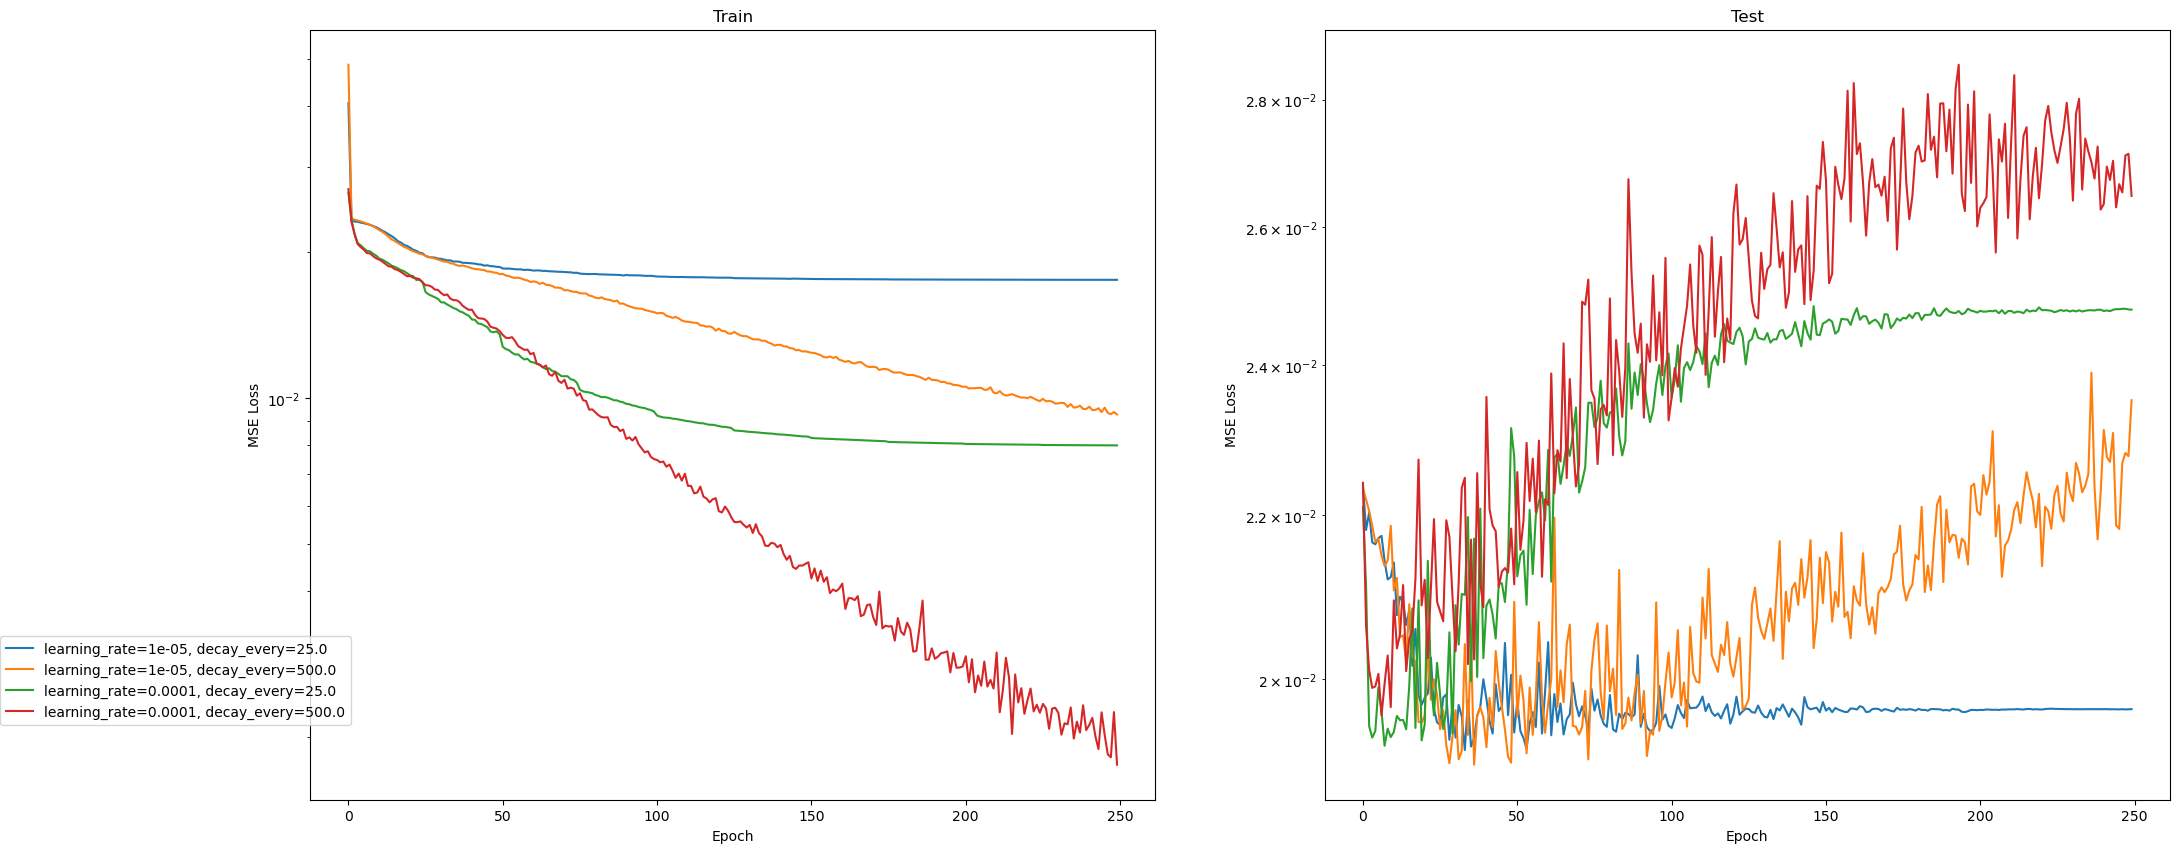

In [5]:
fig, axs = readers.plot_training(tags=None, mode='loss', legend=(0, .15), sharey=False, figsize=(24, 10))

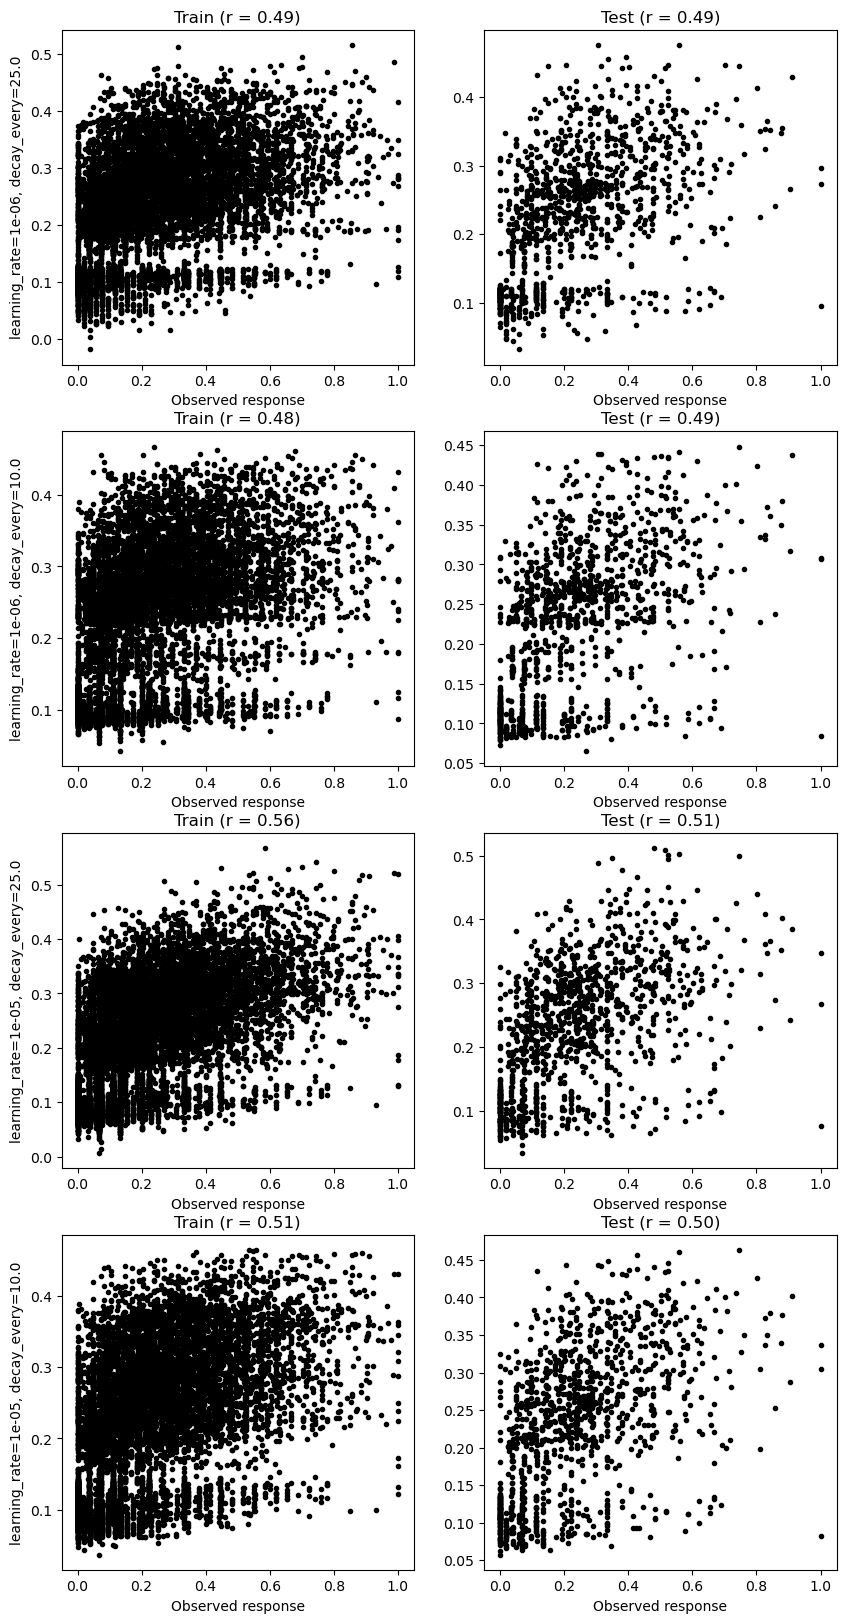

In [15]:
readers.scatter_plots(tags=None)